In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

#from matplotlib import rcParams
#rcParams['figure.figsize'] = 16, 12
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']

## Load MEG Data for Testing (Using omegamappin-library)

In [2]:
import sys
sys.path.append('/Users/tom/Documents/GitCode/omegamappin/')

from om.core.db import OMDB
from om.core.io import load_meg_psds

In [3]:
# Get database and path details from OMDB class
db = OMDB()
# Check available subject numbers for PSD files
sub_nums = db.check_dat_files('PSD')


Number of Subjects available: 103

Subject numbers with FOOF data available: 
[111802, 124340, 195121, 215187, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 719634, 756575, 978341, 100307, 102816, 105923, 106521, 109123, 111514, 112920, 113922, 116524, 116726, 140117, 146129, 153732, 154532, 156334, 158136, 162026, 162935, 164636, 166438, 172029, 174841, 175237, 175540, 181232, 185442, 187547, 189349, 191033, 191437, 191841, 192641, 195041, 198653, 204521, 205119, 212318, 212823, 214524, 221319, 223929, 233326, 248339, 250427, 255639, 257845, 283543, 293748, 352132, 352738, 353740, 358144, 406836, 433839, 512835, 555348, 559053, 568963, 581450, 599671, 601127, 660951, 662551, 665254, 667056, 706040, 707749, 715950, 725751, 735148, 783462, 814649, 877168, 891667, 898176, 912447, 917255, 990366]



In [4]:
# Get PSD files
psd_files, _ = db.check_dat_files('PSD', verbose=False)

In [5]:
# Load MEG Data
subj = 352132
psd, freqs = load_meg_psds('HCP', db.psd_path, subj)

In [6]:
# Set which PSD to run
# 4799
#cur_psd = np.log10(psd[4799, :])
cur_psd = np.log10(psd[6395, :])

### Or: Load MEG Data from file

In [ ]:
#dat = np.load('meg_dat.npy')
#freqs = dat[0]
#psd = dat[1]

## Load EEG data for testing

In [ ]:
# Load
dat = np.load('data-for-tom.npy').item()

# Get freqs & unembed from being an array of arrays
freqs = dat['f']
freqs = np.array([f[0] for f in freqs])

In [ ]:
# Grab psd of interest
cur_psd = np.log10(dat[0][20]['eyeso'])

In [ ]:
### Load other EEG data

### Load other EEG data

In [ ]:
def data_eeg(filename, freq_range):

    psd_array = np.load(filename)
    psd_array = np.log10(psd_array)

    range_size = np.size(range(freq_range[1]))-np.size(range(freq_range[0]))
    xf = np.linspace(freq_range[0], freq_range[1], range_size)
    
    psd_array = psd_array.T
    
    return psd_array, xf

In [ ]:
file_path = '/Users/tom/Documents/GitCode/fooof/data/eeg/'
psd, freqs = data_eeg(file_path + '44.npy', [0, 50])

In [ ]:
cur_psd = psd[:, 5]

## RUN FOOOF

In [16]:
# Custom Code Import
%autoreload 2
from fooof import FOOOF

In [17]:
ff = FOOOF(bandwidth_limits=[0.5,8])
f_range = [3, 40]


                                          FOOOF - PSD MODEL                                          

                     The input PSD was modelled in the frequency range 3-40 Hz                      
                                 Frequency Resolution is 0.49 Hz 
                                  
                                      Background Parameters:                                        
                                    -21.8136, -0.5305, 2.88e-02                                     

                                      5 oscillations were found:                                     
                                 CF:   8.87, Amp:  0.105, BW:  0.50                                 
                                 CF:  10.49, Amp:  0.096, BW:  0.92                                 
                                 CF:  13.26, Amp:  0.064, BW:  0.50                                 
                                 CF:  16.27, Amp:  0.115, BW:  0.60                   

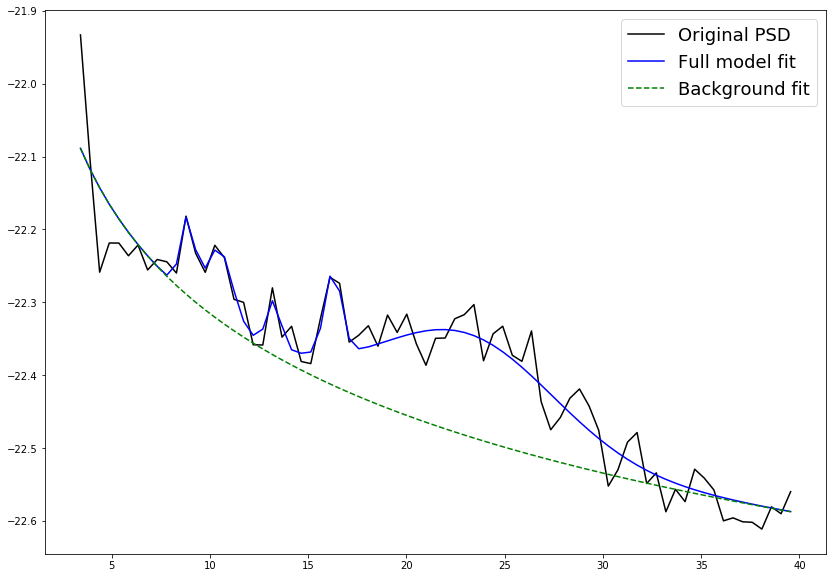

In [18]:
ff.model(freqs, cur_psd, f_range)

In [19]:
ff.oscillation_params

array([[  8.87082773,   0.1070033 ,   0.5       ],
       [ 10.49398178,   0.0987458 ,   0.92341872],
       [ 13.25770242,   0.09150598,   0.5       ],
       [ 16.27343132,   0.1464306 ,   0.6009144 ],
       [ 23.1343708 ,   0.16528556,   6.29611686]])

In [20]:
ff._gaussian_params

array([[  8.87082773,   0.1047186 ,   0.5       ],
       [ 10.49398178,   0.09626928,   0.92341872],
       [ 13.25770242,   0.06355318,   0.5       ],
       [ 16.27343132,   0.11514034,   0.6009144 ],
       [ 23.1343708 ,   0.14091105,   6.29611686]])

In [ ]:
%%time
ff.fit(freqs, cur_psd, f_range)

In [ ]:
# MEG DATA - 6395

In [ ]:
psd.shape[1]

In [ ]:
for i in range(0, psd.shape[1]):
    print(i)
    ff.fit(freqs, psd[:, i], f_range)

In [ ]:
plt.plot(freqs, psd[:, 5])

In [ ]:
lo_bound = ff.freq_range[0], 0, ff.bandwidth_limits[0]
hi_bound = ff.freq_range[1], np.inf, ff.bandwidth_limits[1]

In [ ]:
num_of_oscillations = 3

In [ ]:
gaus_param_bounds = lo_bound*num_of_oscillations, hi_bound*num_of_oscillations

In [ ]:
gaus_param_bounds

In [ ]:
2 * np.sqrt(2 * np.log(2))

In [ ]:
np.ln

In [ ]:
ff.oscillation_params

In [ ]:
cf, bw 

In [ ]:
lo_bound = [[osc[0]-osc[2], 0, ff.bandwidth_limits[0]] for osc in ff.oscillation_params]
hi_bound = [[osc[0]+osc[2], 0, ff.bandwidth_limits[1]] for osc in ff.oscillation_params]

In [ ]:
gaus_param_bounds = (tuple([item for sublist in lo_bound for item in sublist]), \
                    tuple([item for sublist in hi_bound for item in sublist]))

In [ ]:
gaus_param_bounds

In [ ]:
plt.plot(ff.freqs, ff._oscillation_fit)

In [ ]:
# For setting centering size based on consol width:
#import os
#print("hello world".center(os.get_terminal_size().columns))

In [ ]:
ff.oscillation_params

In [ ]:
a1 = ff.oscillation_params[0, 0]
a1

In [ ]:
for i, osc in enumerate(ff.oscillation_params):
    ind = min(range(len(ff.freqs)), key=lambda i: abs(ff.freqs[i]-osc[0]))
    ff.oscillation_params[i, 1] = ff.psd[ind] - ff._background_fit[ind]

In [ ]:
ff.oscillation_params

In [ ]:
plt.plot(ff.freqs, ff.psd)

In [ ]:
ff.plot()

In [10]:
len_f = 10
dat = [None] * len_f

In [11]:
for i, f in enumerate(files):
    dat[i] = Paper()

[None, None, None, None, None, None, None, None, None, None]